### Geopandas Installation

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 7.8MB/s 
     |████████████████████████████████| 6.6MB 30.3MB/s 
     |████████████████████████████████| 15.4MB 187kB/s 


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import pandas as pd
import numpy as np

### Plot Function

In [3]:
def plot_record(shape, df, date):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    shape["Case"] = 0
    ax.set_facecolor("gray")
    
    coords = {
        "Istanbul": (29, 41), 
        "Western Marmara": (27.5, 39.7),
        "Aegean": (28.5, 38),
        "Eastern Marmara": (30, 40),
        "Western Anatolia": (32.5, 38),
        "Mediterranean": (32.5, 36),
        "Central Anatolia": (35.5, 39),
        "Western Blacksea": (34.5, 40.8),
        "Eastern Blacksea": (39.2, 40.5),
        "Northeastern Anatolia": (41.5, 39.8),
        "Mideastern Anatolia": (40.5, 38.8),
        "Southeastern Anatolia": (40, 37.4)
    }
    
    for column in df.columns:
        case_count = df.at[date, column]
        shape.loc[shape["region"] == column, "Case"] = case_count
        plt.annotate(s=case_count, xy=coords[column], horizontalalignment='center', color="white", fontsize=30)
        
    shape.plot(column="Case", ax=ax, legend=True, cmap='copper', legend_kwds={'label': "Case count", 'orientation': "horizontal", 'shrink': 0.3})
    shape.drop(columns=["Case"])

### Map Plot

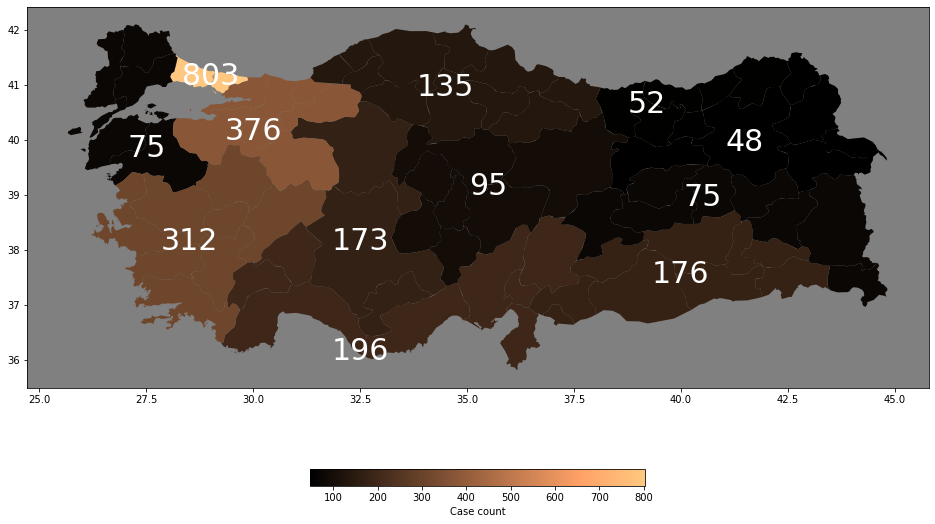

In [4]:
turkey_map = gpd.read_file('https://raw.githubusercontent.com/aParsecFromFuture/COVID-19-stats/main/Turkey/datasets/turkey_regional_map.geojson')
df_turkey = pd.read_csv('https://raw.githubusercontent.com/aParsecFromFuture/COVID-19-stats/main/Turkey/datasets/patient.csv', thousands='.', index_col='Date', parse_dates=['Date'])
date = pd.to_datetime('2020-11-08')

plot_record(turkey_map, df_turkey, date)

### Line Plot

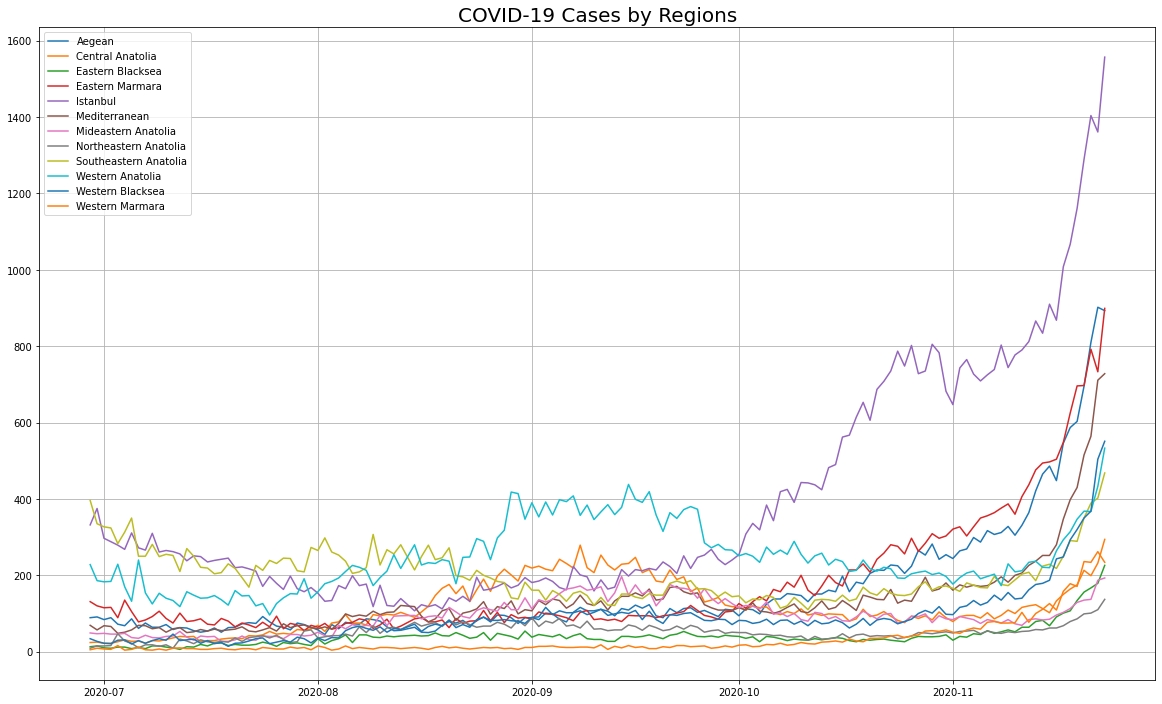

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

ax.set_title('COVID-19 Cases by Regions', fontsize=20)

for column in df_turkey.columns:
    ax.plot(df_turkey[column])
    
ax.legend(df_turkey.columns)

ax.grid()

plt.show()

### Pie Plot

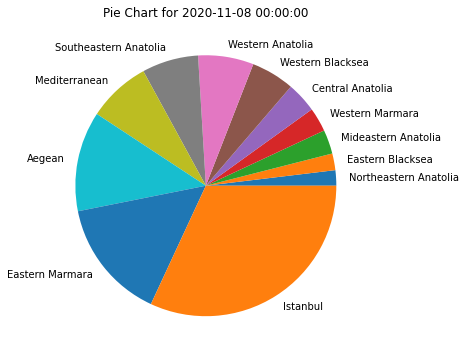

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

x = df_turkey.loc[date].sort_values()

ax.pie(x.values, labels=x.index)
ax.set_title(f'Pie Chart for {date}')

plt.show()